<a href="https://colab.research.google.com/github/gh-pragadee/TASK---5/blob/main/TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
X = df.drop(columns="target")
y = df["target"]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

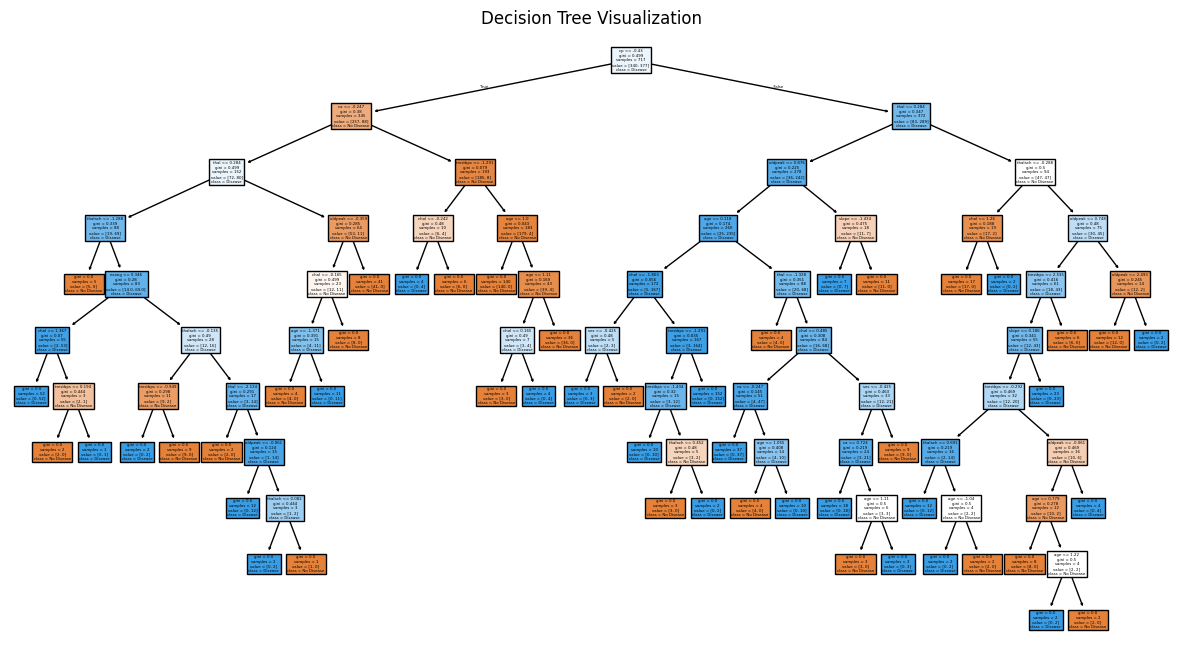

In [7]:
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [8]:
train_acc = []
test_acc = []
depths = range(1, 21)
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

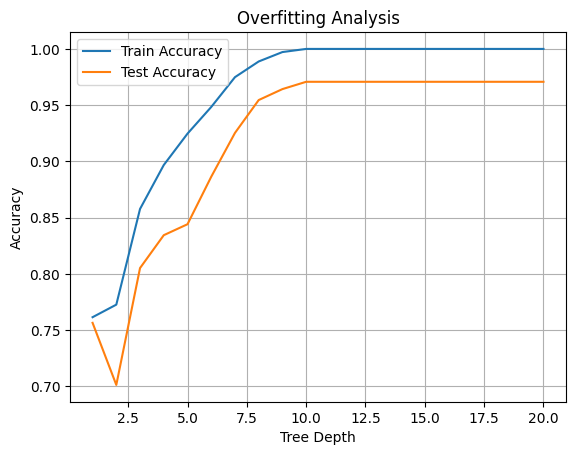

In [9]:
plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9805194805194806
Confusion Matrix:
 [[159   0]
 [  6 143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



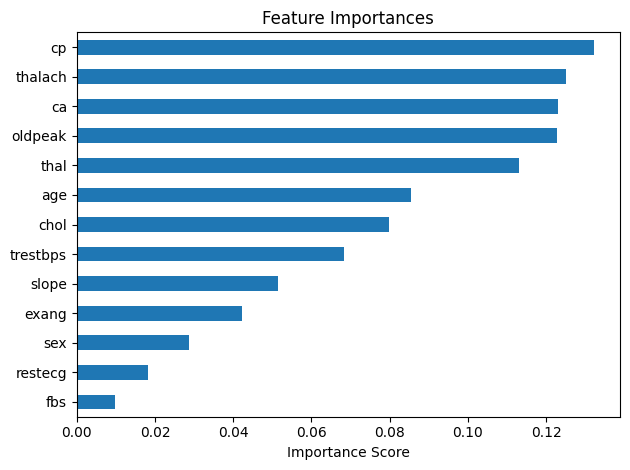

In [11]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", title="Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [12]:
dt_cv = cross_val_score(DecisionTreeClassifier(max_depth=5, random_state=42), X_scaled, y, cv=5)
rf_cv = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_scaled, y, cv=5)
print(f"Decision Tree CV Accuracy: {dt_cv.mean():.3f}")
print(f"Random Forest CV Accuracy: {rf_cv.mean():.3f}")

Decision Tree CV Accuracy: 0.891
Random Forest CV Accuracy: 0.997
